In [2]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t_0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestAllS/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])
fD=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia1_T*.nc')[0])
fD2=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dia2_T*.nc')[0])
fW2=nc.Dataset(idir+'SalishSea_1d_20150501_20150505_layer6m_W_2_20150501-20150505.nc')

In [5]:
len(np.shape(fP.variables['PRD_NH4']))

4

In [6]:
len(np.shape(fD.variables['BFX_PON']))

3

In [9]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon', 'bounds_lat',
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,fD.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))

In [10]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon', 'bounds_lat',
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
           'layer6m_W', 'layer6m_W_bounds')
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [9]:
checkall(fP)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3RAD', 'RIV_NO3', 'RIV_NH4', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'REFRN', 'TBS_DIAT', 'TBS_PON'])
Min/Max:
NO3RAD : 0.0 0.0013451242
RIV_NO3 : 0.0 10410.278
RIV_NH4 : 0.0 5788.9
REM_NO3 : 0.0 9.581778
REM_PON : -6.7637277 -0.0
REM_DON : -12.00917 -0.0
PRD_NO3 : -21.759218 -0.0
PRD_NH4 : -5.907855 -0.0
REFRN : -3.967493e-05 1.5560309e-21
TBS_DIAT : -14.828994 16.169094
TBS_PON : -34.295723 25.525238


In [10]:
checkall(fD)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -2.4161732 2.0754504
ATF_NH4 : -0.56770843 1.7759498
ATF_DON : -0.47563046 0.85519034
ATF_PON : -3.6197355 2.9023535
ATF_LIV : -4.230829 3.2096367
BFX_PON : -0.00018893112 -0.0
BFX_DIAT : -2.2604485e-05 -0.0


In [11]:
checkall(fD2)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHS_NO3', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV', 'SMS_NO3', 'SMS_NH4', 'SMS_DON', 'SMS_PON', 'SMS_LIV'])
Min/Max:
PHS_NO3 : -437.6063 383.81223
PHS_NH4 : -61.002792 64.72221
PHS_DON : -48.269497 59.22118
PHS_PON : -30.01169 36.59474
PHS_LIV : -78.68599 80.143776
SMS_NO3 : -21.748274 9.581778
SMS_NH4 : -5.115639 16.001923
SMS_DON : -4.2821913 7.722708
SMS_PON : -6.4425325 11.967412
SMS_LIV : -39.890717 17.814753


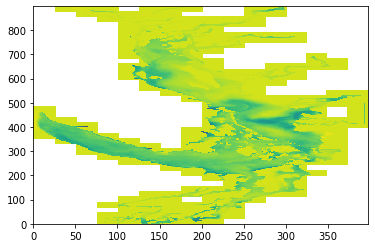

In [12]:
plt.pcolormesh(fD.variables['ATF_NH4'][0,0,:,:])

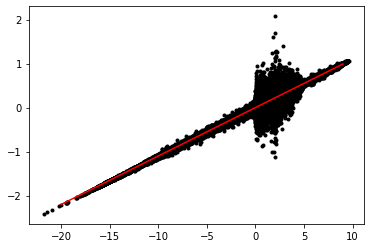

In [20]:
plt.plot(np.ma.masked_where(tmask==0,fD2.variables['SMS_NO3'][-1,:,:,:]).flatten(),np.ma.masked_where(tmask==0,fD.variables['ATF_NO3'][-1,:,:,:]).flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

In [23]:
ind=np.argwhere(np.abs((fD.variables['ATF_NO3'][-1,:,:,:]-.11*fD2.variables['SMS_NO3'][-1,:,:,:]))>.5)

(array([ 3., 11., 41., 83., 53., 48., 20.,  6.,  3.,  2.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

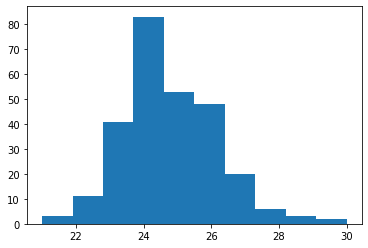

In [27]:
plt.hist(ind[:,0])

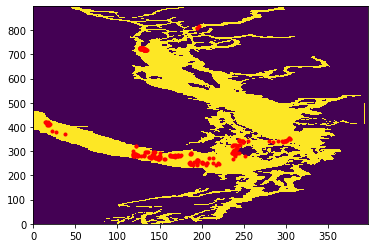

In [30]:
plt.pcolormesh(tmask[0,:,:])
plt.plot(ind[:,2],ind[:,1],'r.')

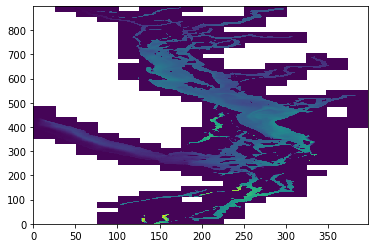

In [31]:
plt.pcolormesh(fD2.variables['SMS_NO3'][-1,24,:,:])

(650, 775)

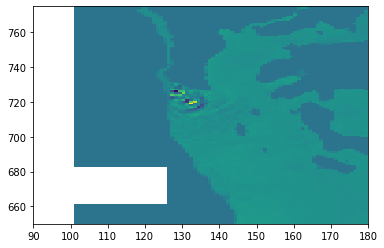

In [38]:
plt.pcolormesh(fD.variables['ATF_NO3'][-1,24,:,:])
plt.xlim(90,180)
plt.ylim(650,775)

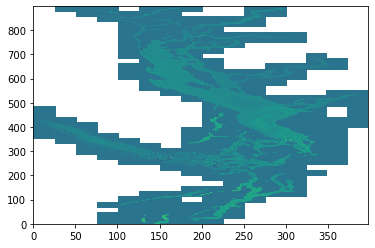

In [34]:
plt.pcolormesh(fD.variables['ATF_NO3'][-3,24,:,:])

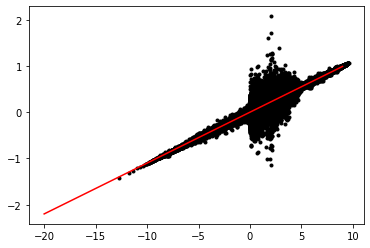

In [14]:
plt.plot(fD2.variables['SMS_NO3'][-1,5:,:,:].flatten(),fD.variables['ATF_NO3'][-1,5:,:,:].flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

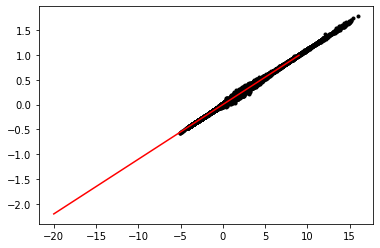

In [15]:
plt.plot(fD2.variables['SMS_NH4'][-1,:,:,:].flatten(),fD.variables['ATF_NH4'][-1,:,:,:].flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

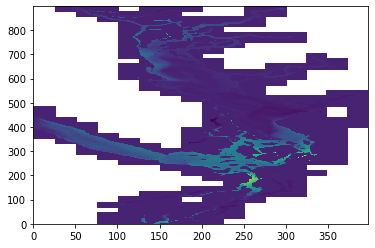

In [33]:
plt.pcolormesh(fD.variables['ATF_NH4'][-1,24,:,:])

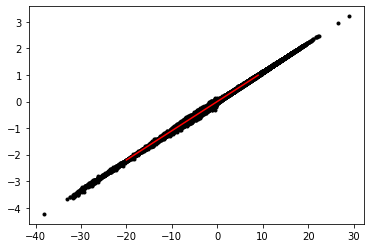

In [17]:
plt.plot(fD2.variables['SMS_LIV'][-1,:,:,:].flatten()+fP.variables['TBS_DIAT'][-1,:,:,:].flatten(),fD.variables['ATF_LIV'][-1,:,:,:].flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

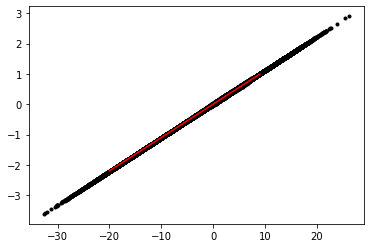

In [18]:
plt.plot(fD2.variables['SMS_PON'][-1,:,:,:].flatten()+fP.variables['TBS_PON'][-1,:,:,:].flatten(),fD.variables['ATF_PON'][-1,:,:,:].flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

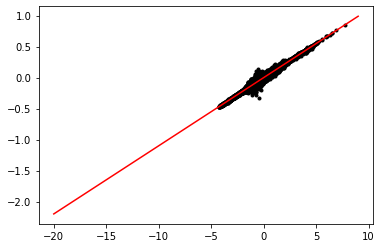

In [19]:
plt.plot(fD2.variables['SMS_DON'][-1,:,:,:].flatten(),fD.variables['ATF_DON'][-1,:,:,:].flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')

In [1]:
fP.close()
fD.close()
fD2.close()

NameError: name 'fP' is not defined

In [7]:
## check 2015 long run  files:
idir='/data/sallen/results/MEOPAR/fluxes/01may15/'
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])

In [11]:
checkall(fP)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PPDIATNO3V', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PPPHYNO3V', 'PPMRUBNO3V', 'RIVNO3', 'BIOTRNO3', 'PHYSTRNO3', 'AFILTNO3', 'NO3_E3TSNAP', 'time_instant', 'time_instant_bounds', 'NITR', 'NO3RAD', 'ALLTRNO3'])
Min/Max:
PPDIATNO3V : 0.0 21.425716
PPPHYNO3V : 0.0 0.7754025
PPMRUBNO3V : 0.0 0.49778932
RIVNO3 : 0.0 10410.278
BIOTRNO3 : -22.168142 9.710541
PHYSTRNO3 : -441.0222 449.45496
AFILTNO3 : -2.4626024 1.8048786
NO3_E3TSNAP : 0.0 1027.3245
unknown shape:  time_instant 1
unknown shape:  time_instant_bounds 2
NITR : 0.0 9.710541
NO3RAD : 0.0 0.0
ALLTRNO3 : -439.19315 454.7921


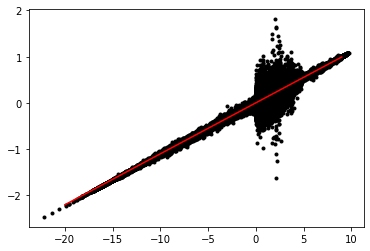

In [12]:
plt.plot(np.ma.masked_where(tmask==0,fP.variables['BIOTRNO3'][-1,:,:,:]).flatten(),
         np.ma.masked_where(tmask==0,fP.variables['AFILTNO3'][-1,:,:,:]).flatten(),'k.')
plt.plot(np.arange(-20,10),.11*np.arange(-20,10),'r-')